In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use('fivethirtyeight')

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
!wget https://raw.githubusercontent.com/TheDataNomad/AlgoWarzmi/main/titanic.csv

--2021-04-15 15:32:14--  https://raw.githubusercontent.com/TheDataNomad/AlgoWarzmi/main/titanic.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 61194 (60K) [text/plain]
Saving to: ‘titanic.csv.1’

titanic.csv.1       100%[===================>]  59.76K   300KB/s    in 0.2s    

2021-04-15 15:32:15 (300 KB/s) - ‘titanic.csv.1’ saved [61194/61194]



In [3]:
data = pd.read_csv("titanic.csv")
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
len(data)

891

In [5]:
print(data.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


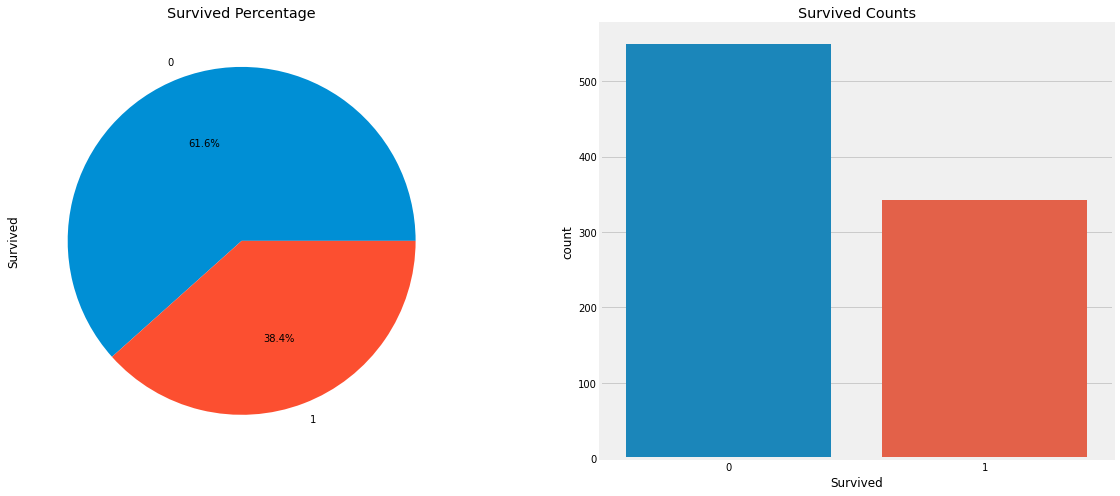

In [6]:
f,ax = plt.subplots(1,2,figsize=(18,8))
data['Survived'].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[0])
ax[0].set_title('Survived Percentage')

sns.countplot('Survived',data=data,ax=ax[1])
ax[1].set_title('Survived Counts')

plt.show()

Sex       female  male  All
Survived                   
0             81   468  549
1            233   109  342
All          314   577  891


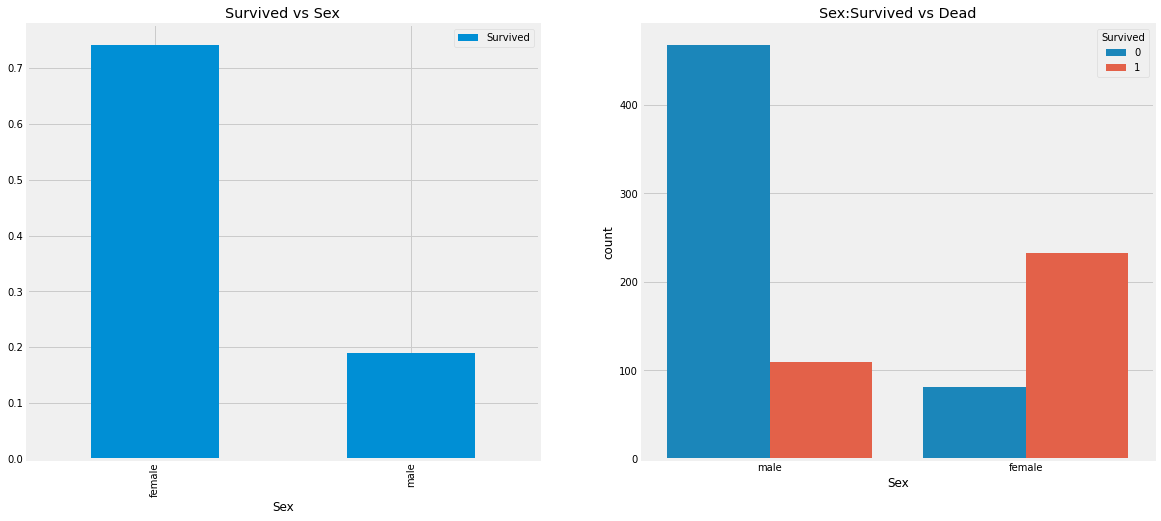

Sex       female  male  All
Survived                   
0             81   468  549
1            233   109  342
All          314   577  891


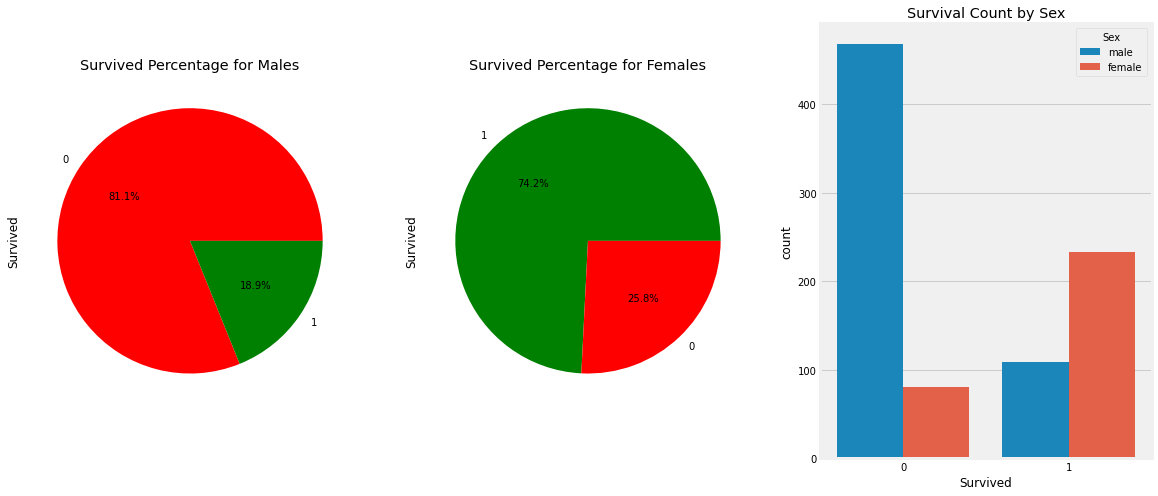

In [7]:
#Survival Based on Sex - Catagorical Feature 

print(pd.crosstab(data.Survived, data.Sex,margins =True))

f,ax= plt.subplots(1,2,figsize=(18,8))
data[['Survived','Sex']].groupby(['Sex']).mean().plot.bar(ax=ax[0])
ax[0].set_title("Survived vs Sex")

sns.countplot('Sex', hue='Survived',data=data, ax =ax[1])
ax[1].set_title("Sex:Survived vs Dead")
plt.show()

print(pd.crosstab(data.Survived,data.Sex,margins=True))

f,ax = plt.subplots(1,3,figsize=(18,8))
data_male = data[data['Sex']=='male']
data_female = data[data['Sex']=='female']

data_male['Survived'].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[0],colors=['red','green'])
ax[0].set_title('Survived Percentage for Males')

data_female['Survived'].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[1],colors=['green','red'])
ax[1].set_title('Survived Percentage for Females')

sns.countplot('Survived',data=data,ax=ax[2],hue='Sex',)
ax[2].set_title('Survival Count by Sex')

plt.show()

In [8]:
pd.crosstab(data.Pclass,data.Survived,margins=True).style.background_gradient(cmap='Paired')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


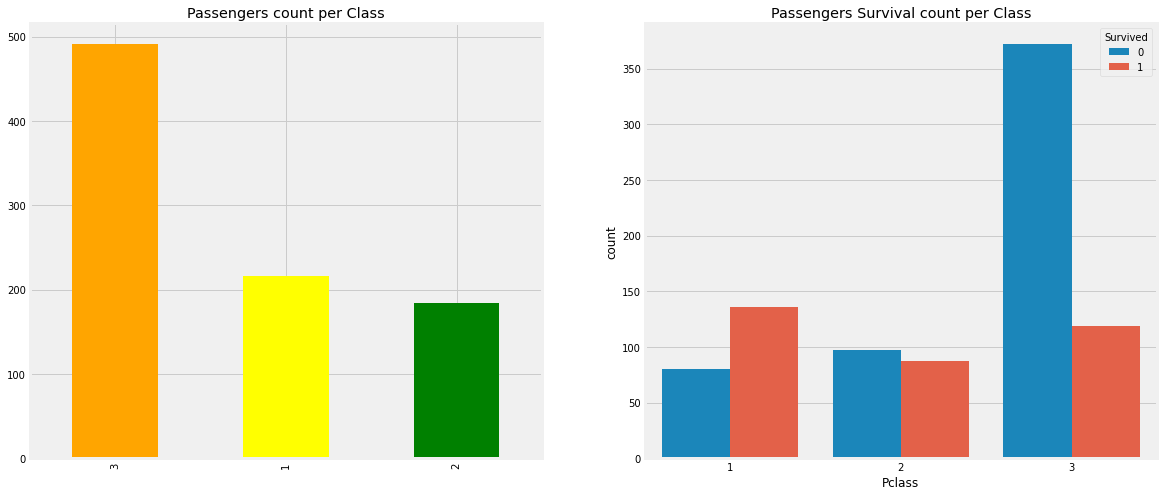

In [9]:
f,ax= plt.subplots(1,2,figsize=(18,8))

data['Pclass'].value_counts().plot.bar(ax=ax[0],color=['orange','yellow','green'])
ax[0].set_title('Passengers count per Class')

sns.countplot('Pclass',hue='Survived',ax=ax[1],data=data)
ax[1].set_title('Passengers Survival count per Class')
plt.show()

In [10]:
pd.crosstab([data.Sex,data.Survived],data.Pclass,margins=True).style.background_gradient('summer_r')

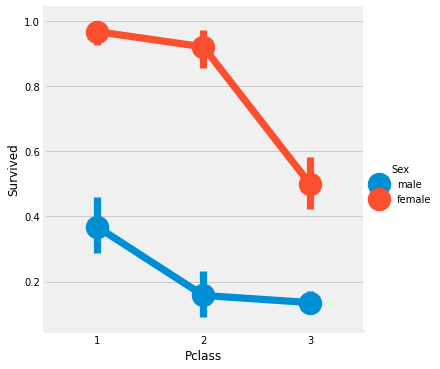

In [11]:
sns.factorplot('Pclass','Survived',hue='Sex',data=data)

In [12]:
print(f"The Oldest person is {data['Age'].max()} years")
print(f"The Youngest person is {data['Age'].min()} years")
print(f"The Average age is {data['Age'].mean()} years")

The Oldest person is 80.0 years
The Youngest person is 0.42 years
The Average age is 29.69911764705882 years


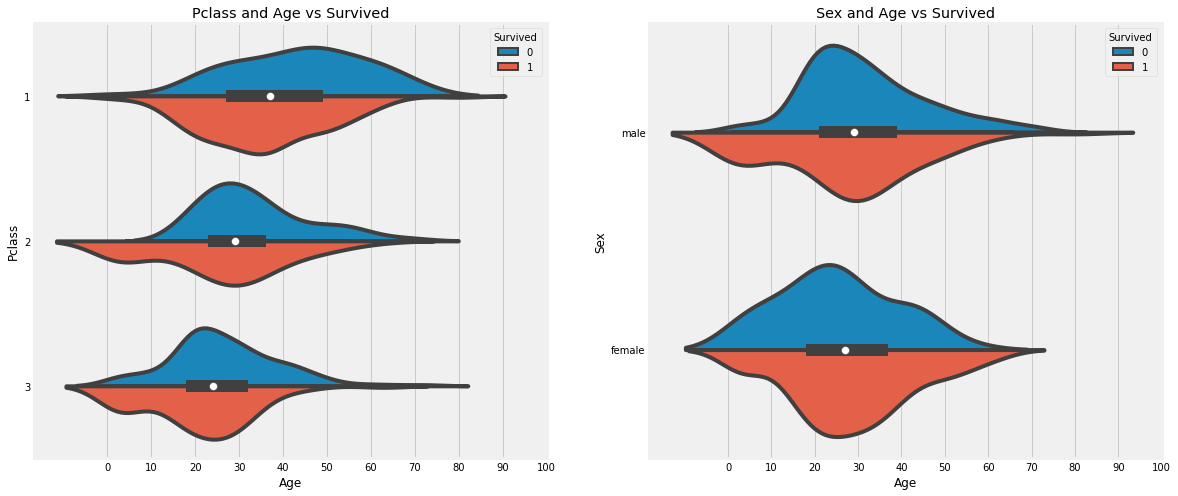

In [13]:
f,ax= plt.subplots(1,2,figsize=(18,8))

sns.violinplot(x = "Age", y="Pclass", hue= "Survived", data =data, ax=ax[0],split=True,orient='h')
ax[0].set_title("Pclass and Age vs Survived")
ax[0].set_xticks(range(0,110,10))


sns.violinplot(x = "Age", y="Sex", hue= "Survived", data =data, ax=ax[1],split=True,orient='h')
ax[1].set_title("Sex and Age vs Survived")
ax[1].set_xticks(range(0,110,10))


plt.show()

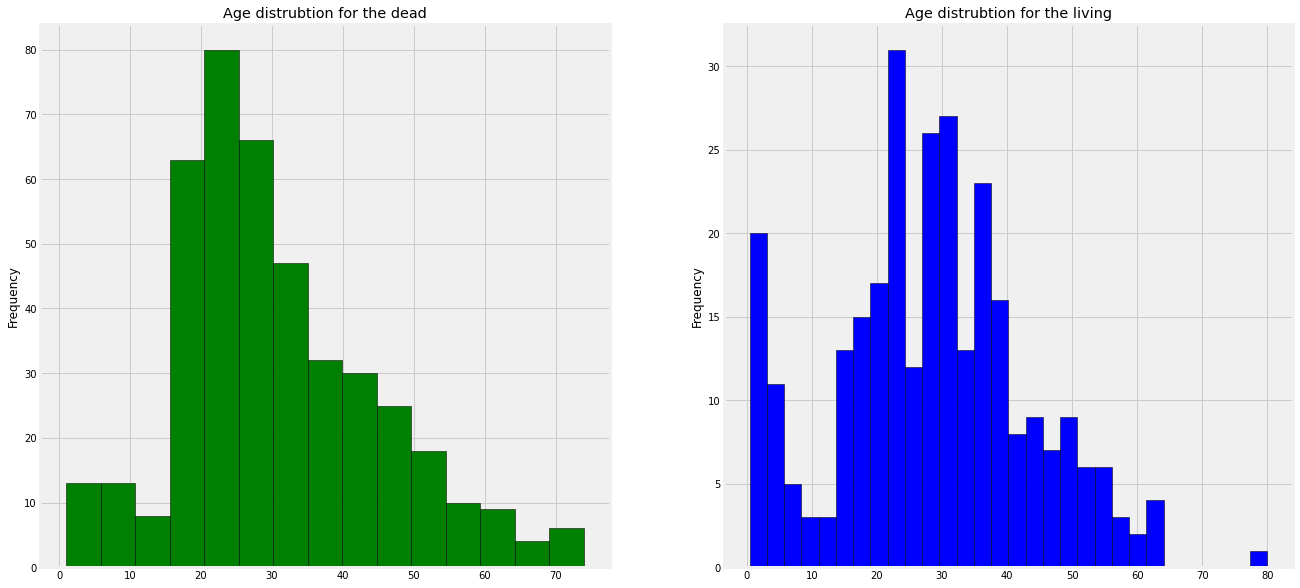

In [14]:
f,ax=plt.subplots(1,2,figsize=(20,10))

data[data['Survived']==0].Age.plot.hist(ax=ax[0], bins=15,color='g',edgecolor='k')
ax[0].set_title("Age distrubtion for the dead")


data[data['Survived']==1].Age.plot.hist(ax=ax[1], bins=30,color='b',edgecolor='k')
ax[1].set_title("Age distrubtion for the living")
plt.show()

In [15]:
pd.crosstab([data.Embarked,data.Pclass],[data.Survived,data.Sex],margins=True).style.background_gradient('summer_r')

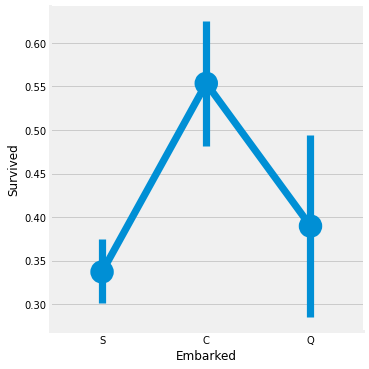

In [16]:
sns.factorplot('Embarked','Survived',data=data)

plt.show()

Text(0.5, 1.0, 'Pclass vs Embarked')

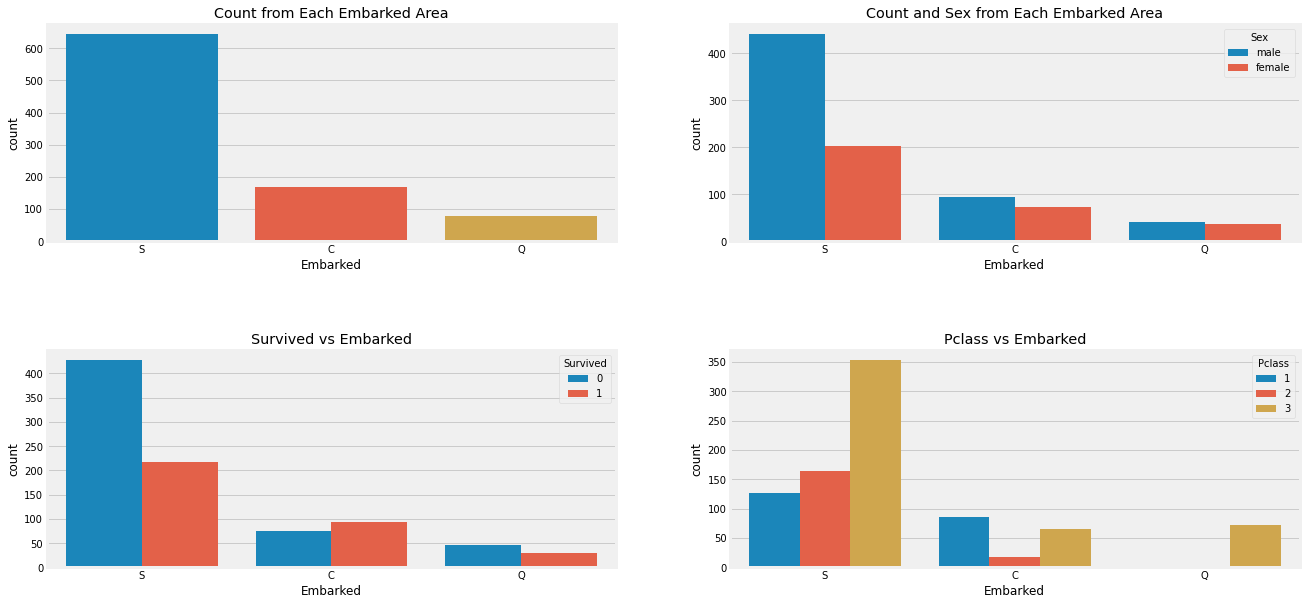

In [17]:
f,ax=plt.subplots(2,2,figsize=(20,10))
plt.subplots_adjust(hspace=0.5)

sns.countplot('Embarked',data=data, ax=ax[0,0])
ax[0,0].set_title("Count from Each Embarked Area")

sns.countplot('Embarked',data=data,hue='Sex',ax=ax[0,1])
ax[0,1].set_title("Count and Sex from Each Embarked Area")

#Embarked and Survived
sns.countplot('Embarked',data=data,hue='Survived',ax=ax[1,0])
ax[1,0].set_title("Survived vs Embarked")

sns.countplot('Embarked',data=data,hue='Pclass',ax=ax[1,1])
ax[1,1].set_title("Pclass vs Embarked")

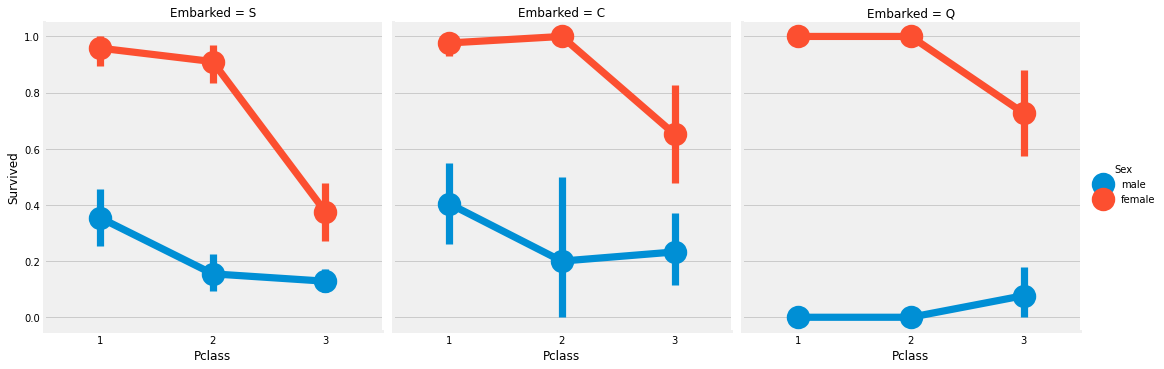

In [18]:
sns.factorplot('Pclass','Survived',hue='Sex',col='Embarked',data=data)
plt.show()

In [19]:
#Siblings #Spouses

pd.crosstab(data.SibSp,[data.Survived], margins =True).style.background_gradient(cmap ='summer_r')

Survived,0,1,All
SibSp,,,
0,398,210,608
1,97,112,209
2,15,13,28
3,12,4,16
4,15,3,18
5,5,0,5
8,7,0,7
All,549,342,891


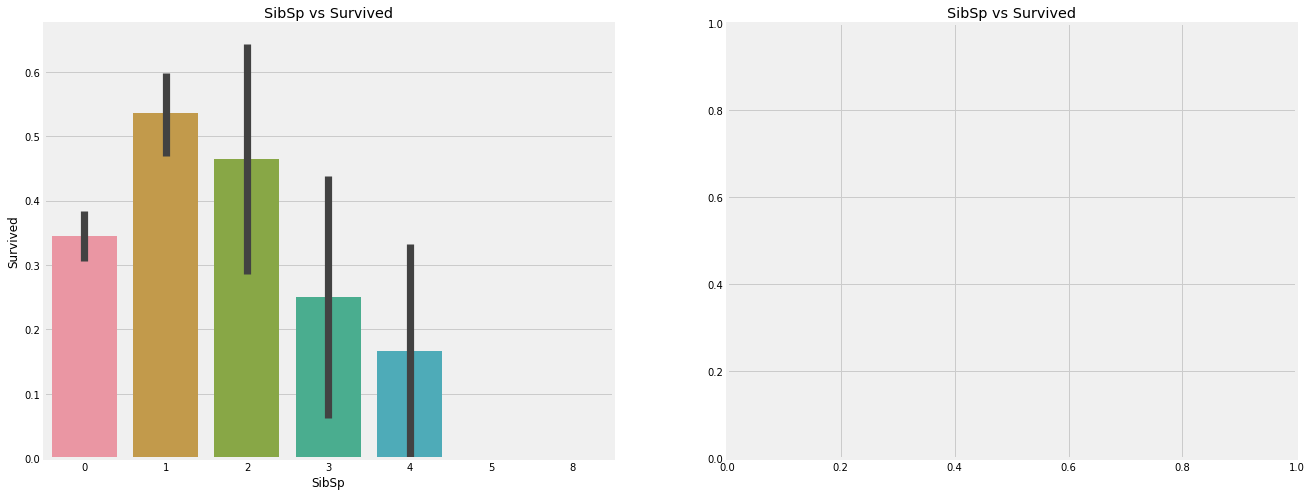

In [20]:
f,ax=plt.subplots(1,2,figsize=(20,8))
sns.barplot('SibSp','Survived',data=data,ax=ax[0])
ax[0].set_title('SibSp vs Survived')
sns.factorplot('SibSp','Survived',data=data,ax=ax[1])
ax[1].set_title('SibSp vs Survived')
plt.close(2)
plt.show()

In [21]:
pd.crosstab(data.SibSp,data.Pclass).style.background_gradient(cmap='summer_r')

Pclass,1,2,3
SibSp,,,
0,137,120,351
1,71,55,83
2,5,8,15
3,3,1,12
4,0,0,18
5,0,0,5
8,0,0,7


In [22]:
pd.crosstab(data.Parch,data.Pclass).style.background_gradient(cmap='summer_r')

Pclass,1,2,3
Parch,,,
0,163,134,381
1,31,32,55
2,21,16,43
3,0,2,3
4,1,0,3
5,0,0,5
6,0,0,1


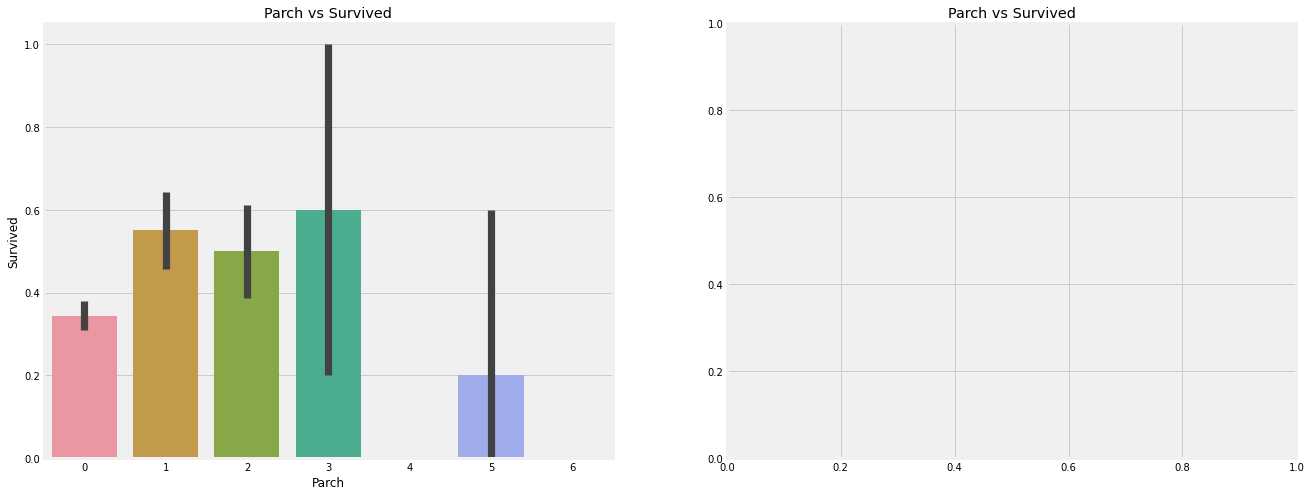

In [23]:
f,ax=plt.subplots(1,2,figsize=(20,8))
sns.barplot('Parch','Survived',data=data,ax=ax[0])
ax[0].set_title('Parch vs Survived')
sns.factorplot('Parch','Survived',data=data,ax=ax[1])
ax[1].set_title('Parch vs Survived')
plt.close(2)
plt.show()

In [24]:
print('Highest Fare was:',data['Fare'].max())
print('Lowest Fare was:',data['Fare'].min())
print('Average Fare was:',data['Fare'].mean())

Highest Fare was: 512.3292
Lowest Fare was: 0.0
Average Fare was: 32.204207968574636


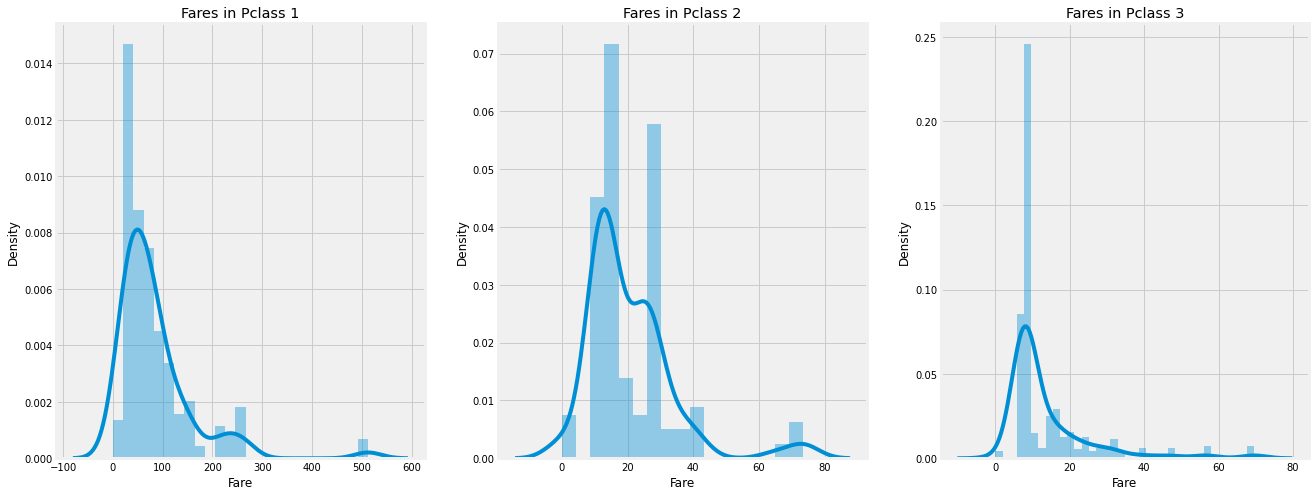

In [25]:
f,ax=plt.subplots(1,3,figsize=(20,8))
sns.distplot(data[data['Pclass']==1].Fare,ax=ax[0])
ax[0].set_title('Fares in Pclass 1')


sns.distplot(data[data['Pclass']==2].Fare,ax=ax[1])
ax[1].set_title('Fares in Pclass 2')

sns.distplot(data[data['Pclass']==3].Fare,ax=ax[2])
ax[2].set_title('Fares in Pclass 3')
plt.show()

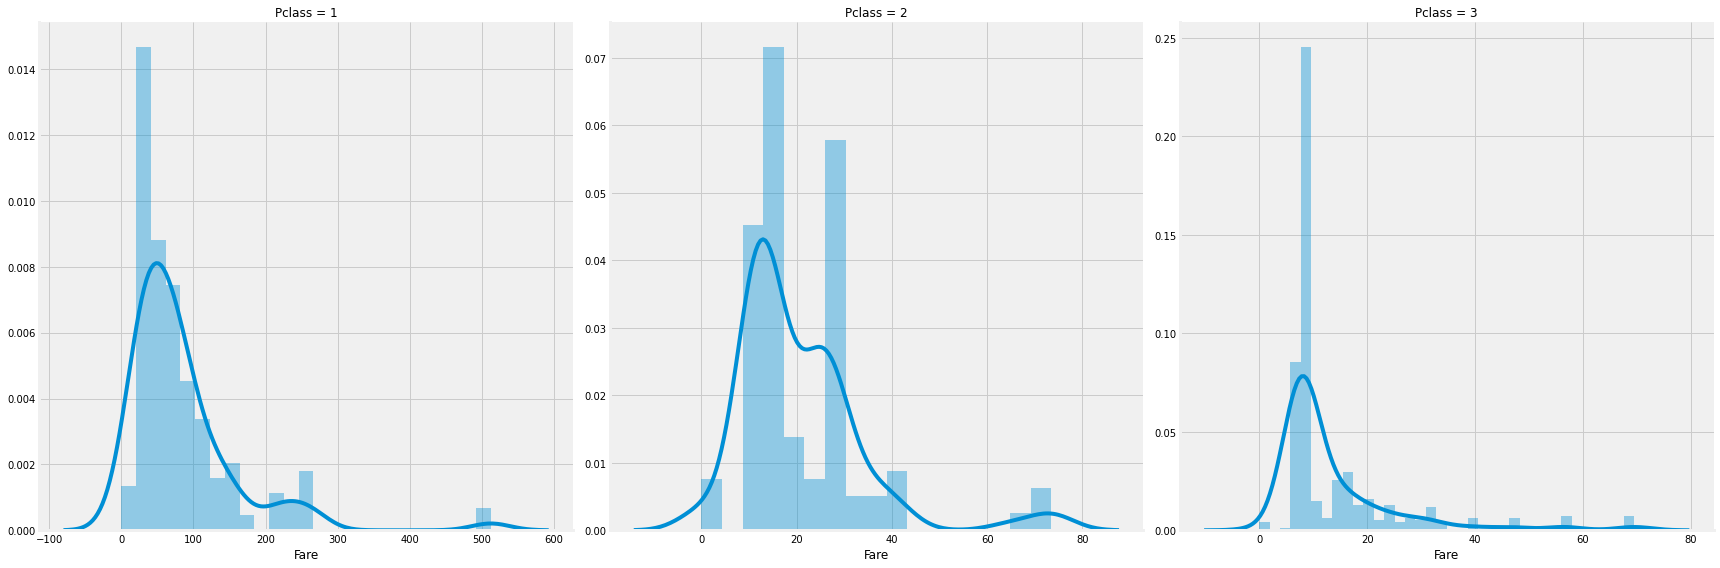

In [26]:
g = sns.FacetGrid(data,col="Pclass",sharex=False,sharey=False,height=8)
g = g.map(sns.distplot,"Fare")

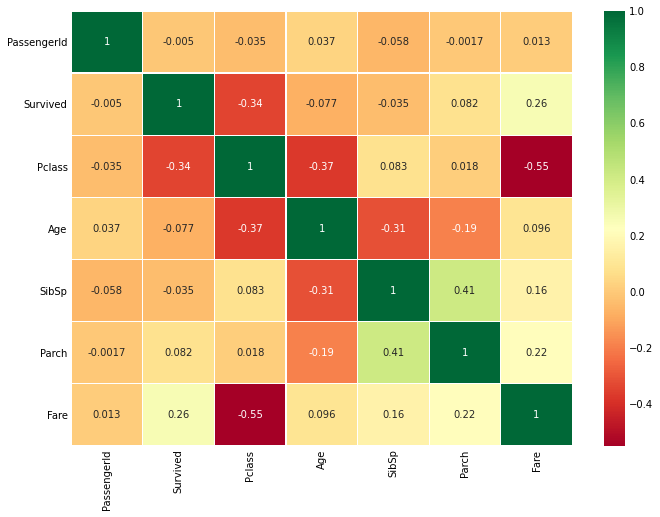

In [27]:
sns.heatmap(data.corr(),annot=True,cmap='RdYlGn',linewidths=0.2) #data.corr()-->correlation matrix
fig=plt.gcf()
fig.set_size_inches(10,8)
plt.show()

<AxesSubplot:xlabel='Age', ylabel='Density'>

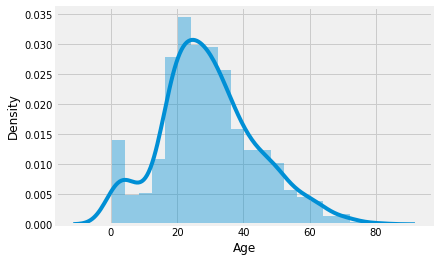

In [28]:
sns.distplot(data.Age)

<AxesSubplot:xlabel='Age'>

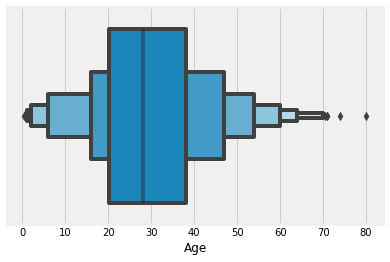

In [29]:
# Outliers Using BoxPlot
sns.boxenplot("Age",data=data)

In [30]:
## Handling Missing Data

data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [31]:
data.isnull().sum()/len(data)*100

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

In [32]:
data.drop("Cabin",axis=1,inplace=True)

In [33]:
data['Embarked'].fillna('S',inplace =True)

<AxesSubplot:xlabel='Age', ylabel='Density'>

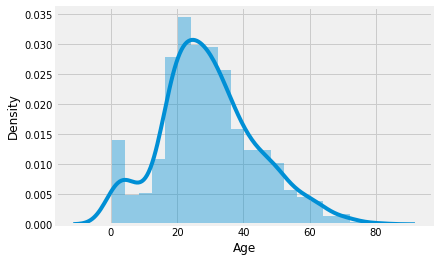

In [34]:
#How to handle Age, 
sns.distplot(data.Age)

In [35]:
print("min Age: ",data.Age.min())
print("Mode Age: ",data.Age.mode()[0])
print("Average Age: ",data.Age.mean())
print("Median Age: ",data.Age.median())
print("Max Age: ",data.Age.max())

min Age:  0.42
Mode Age:  24.0
Average Age:  29.69911764705882
Median Age:  28.0
Max Age:  80.0


In [36]:
data[["Name","Age"]]

,Name,Age
0,"Braund, Mr. Owen Harris",22.0
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0
2,"Heikkinen, Miss. Laina",26.0
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0
4,"Allen, Mr. William Henry",35.0
...,...,...
886,"Montvila, Rev. Juozas",27.0
887,"Graham, Miss. Margaret Edith",19.0
888,"Johnston, Miss. Catherine Helen ""Carrie""",NaN
889,"Behr, Mr. Karl Howell",26.0


In [37]:
for row in data:
    data['Initial'] = data.Name.str.extract('([A-Za-z]+)\.')

In [38]:
pd.crosstab(data.Sex,data.Initial).style.background_gradient(cmap="summer_r")

Initial,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


In [39]:
data[['Age','Initial']].groupby(['Initial']).mean().T.astype('int32')

Initial,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Age,70,58,33,40,42,38,48,48,4,21,24,24,32,35,28,43,49


In [40]:
data["AgeNull"] = [1 if str(age)=='nan' else 0 for age in data["Age"]]
data[['AgeNull','Initial']].groupby(['Initial']).sum().T.astype('int32')

Initial,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
AgeNull,0,0,0,0,1,0,0,0,4,36,0,0,119,17,0,0,0


In [41]:
data.loc[(data.Age.isnull())&(data.Initial=='Mr'),'Age'] = 32.0
data.loc[(data.Age.isnull())&(data.Initial=='Dr'),'Age'] = 42.0
data.loc[(data.Age.isnull())&(data.Initial=='Master'),'Age'] = 4.0
data.loc[(data.Age.isnull())&(data.Initial=='Miss'),'Age'] = 21.0
data.loc[(data.Age.isnull())&(data.Initial=='Mrs'),'Age'] = 35.0

<AxesSubplot:xlabel='Age', ylabel='Density'>

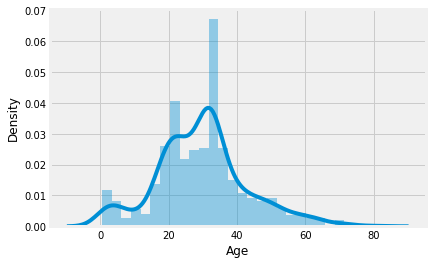

In [42]:
sns.distplot(data.Age)

In [43]:
# Feature Engineering to get the data ready for Machine Learning
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
 11  Initial      891 non-null    object 
 12  AgeNull      891 non-null    int64  
dtypes: float64(2), int64(6), object(5)
memory usage: 90.6+ KB


In [44]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Initial,AgeNull
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,Mr,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,Mrs,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,Miss,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,Mrs,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,Mr,0


In [45]:
data.drop(['PassengerId',"Name","Ticket","AgeNull"],axis=1,inplace=True)

In [46]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Initial
0,0,3,male,22.0,1,0,7.2500,S,Mr
1,1,1,female,38.0,1,0,71.2833,C,Mrs
2,1,3,female,26.0,0,0,7.9250,S,Miss
3,1,1,female,35.0,1,0,53.1000,S,Mrs
4,0,3,male,35.0,0,0,8.0500,S,Mr


In [47]:
data["SexTest"] = [1 if x=="male" else 0 for x in data["Sex"]]
#data['Sex'].replace(['male','female'],[0,1],inplace=True)
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
data["Sex"] = label_encoder.fit_transform(data["Sex"])

In [48]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Initial,SexTest
0,0,3,1,22.0,1,0,7.2500,S,Mr,1
1,1,1,0,38.0,1,0,71.2833,C,Mrs,0
2,1,3,0,26.0,0,0,7.9250,S,Miss,0
3,1,1,0,35.0,1,0,53.1000,S,Mrs,0
4,0,3,1,35.0,0,0,8.0500,S,Mr,1


In [49]:
data.drop('SexTest',axis=1,inplace=True)

In [50]:
data["Embarked"] = label_encoder.fit_transform(data["Embarked"])
data["Initial"] = label_encoder.fit_transform(data["Initial"])

In [51]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Initial
0,0,3,1,22.0,1,0,7.2500,2,12
1,1,1,0,38.0,1,0,71.2833,0,13
2,1,3,0,26.0,0,0,7.9250,2,9
3,1,1,0,35.0,1,0,53.1000,2,13
4,0,3,1,35.0,0,0,8.0500,2,12


<AxesSubplot:xlabel='Age', ylabel='Count'>

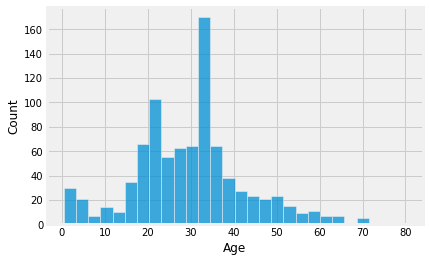

In [52]:
#Continous data [Age, Fare]

sns.histplot(data['Age'])

In [53]:
#we need to make it discrete 
data["Age"]= pd.qcut(data['Age'],5)

In [54]:
data["Age"] = label_encoder.fit_transform(data["Age"])
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Initial
0,0,3,1,1,1,0,7.2500,2,12
1,1,1,0,3,1,0,71.2833,0,13
2,1,3,0,1,0,0,7.9250,2,9
3,1,1,0,3,1,0,53.1000,2,13
4,0,3,1,3,0,0,8.0500,2,12


In [55]:
data["Fare"] = pd.qcut(data['Fare'],8)
data["Fare"] = label_encoder.fit_transform(data["Fare"])
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Initial
0,0,3,1,1,1,0,0,2,12
1,1,1,0,3,1,0,7,0,13
2,1,3,0,1,0,0,2,2,9
3,1,1,0,3,1,0,6,2,13
4,0,3,1,3,0,0,2,2,12


<AxesSubplot:>

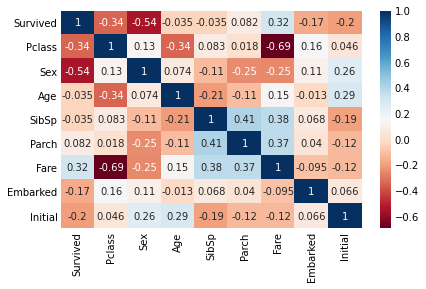

In [59]:
sns.heatmap(data.corr(),annot=True,cmap="RdBu")